## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 10: Review
## Due 15 December, 2019 at 11:59 PM
### Kevin Egedy

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Choose **<u>one</u>** of the following problems. Solve the problem and then write up your solution in a stand alone Jupyter Notebook. Your notebook should have the following elements:

- Problem statement
- Mathematical description of the solution
- Executable code, commented, clear code

You will be graded on how well your notebook reads like a nicely formated, well written report. You must:

- Write mathematical descriptions using complete sentences, paragraphs, and LaTeX formulas. 
- Comment your code as necessary, with a description of what each function does and all major steps.
- Label plots axes, use legends, and use plot titles. 

# Differential Equations for Neural Networks

The computational neural networks we have been studying are quite far from what is happening in biology. A slightly more realistic model is to admit that each neuron $i$ in a network has a time varying firing rate $x_i$, for $i$ equal $1$ to $n$. We let $W \in \mathbb{R}^{n \times n}$ be weight matrix, and $b \in \mathbb{R}^n$. The dynamics of such a neural network are

$$
\dot x_i = g \left (
\sum_{j=1}^n w_{i,j} x_j + b_i
\right )
$$

where is the nonlinearity

$$
g(x) = \frac{1}{1+e^{-x}} - \frac{1}{2} .
$$

*a)* Show through simulation that the matrix 

$$
W = - \begin{pmatrix}
1 & 2 & 0 \\
0 & 1 & 2 \\
2 & 0 & 1
\end{pmatrix}
$$

with $b = 0$ results in oscillations. This is called a ring oscillator. Draw a graph representation of it. Now show through simulation that a ring of $n$ neurons so arranged oscillates when $n$ is odd, but not when it is even.

*b)* Define $W$ and $b$ so that the resulting network is bistable. That is, when one neuron is on in steady state, another is off, and *vice versa*. Simulate the system with different initial conditions. Draw a graph representation of your network.

*c)* Build a network that contains two subnetworks that oscillate, that are connected in such a way that if one subnetwork oscillates, it prevents the other from oscillating, and *vice versa*. Simulate the system with different initial conditions to show the desired behavior. Draw a graph representation of your network.

*d)* Define $W \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}^n$ with $n = 50$ to be a random neural network. 

Given a number $p \in [0,1]$, define a random matrix $A$ as follows. For each $i,j$, choose $r \in [0,1]$ randomly. Then put

$$
A_{i,j} = \left \{
\begin{array}{ll}
1 & \mathrm{if} & r \leq \frac{p}{2} \\
-1 & \mathrm{if} & \frac{p}{2} < r \leq p \\
0 & \mathrm{otherwise}.
\end{array}
\right .
$$

Then put 

$$
W = A - I
$$

where $I$ is the identity matrix. Through simulations with $n=20$, explain the various behaviors you can get with various values of $p$. 

<hr>

In [1]:
# Imports
import math
import numpy as np
import sympy as sp
from sympy import lambdify
sp.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import networkx as nx
import random
import scipy
import scipy.ndimage
import scipy.integrate as spi
import sys
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

http://genomics.princeton.edu/rajan/downloads/papers/Rajan2005.pdf

The function $g(x)$ describes a nonlinear relationship between the firing rate and current. A plot of $g(x)$ is provided for visualization.

In [2]:
# nonlinearity relationship
def g(x):
    return 1/(1+np.exp(-x))-(1/2)

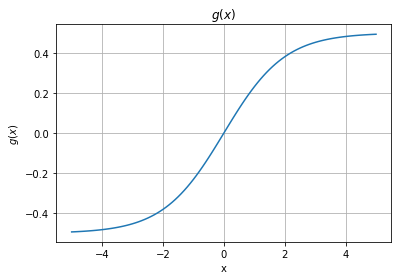

In [3]:
x = np.linspace(-5,5,101)
fix,ax = plt.subplots()
ax.plot(x,g(x))
ax.set_xlabel('x')
ax.set_ylabel('$g(x)$')
ax.set_title('$g(x)$')
plt.grid(True);

The systems is defined with parameters $n = 3$, $b = 0$ and $t$ is from $0$ to $100$. To simulate a realistic model, the initial conditions are chosen such that $X$ is randomized from $[-1,1]$. Setting initial conditions to $X = [-0.65, 0.20, 0.34]$ provides nicely shaped oscillations.

In [4]:
# Dynamics of Neural Network
def firing_rates(init,t,W,b,neurons):
    X = init
    N = int(neurons)
    X_rate = [0]*N
    for i in range(N): 
        s = 0  # sum 
        for j in range(N):
            s += W[i,j]*X[j]
        X_rate[i] = g(s+b[i])  # np.dot(W[i],X) + b[i]
    return X_rate

In [5]:
# neurons
N = 3

# weight matrix
W = -np.array([
    [1,2,0],
    [0,1,2],
    [2,0,1]
])

# bias
b = np.zeros(N)

# time
t = np.linspace(0., 100, 6000)

#  X: presynaptic neuron firing rate
def generate_initial_cond(N):
    return np.random.uniform(-1,1,size=N)

The scipy library is used to calculate the steady state neuron firing rate. The system is visualized in 2D comparing each of the neuron firing rates to each other and against time. 

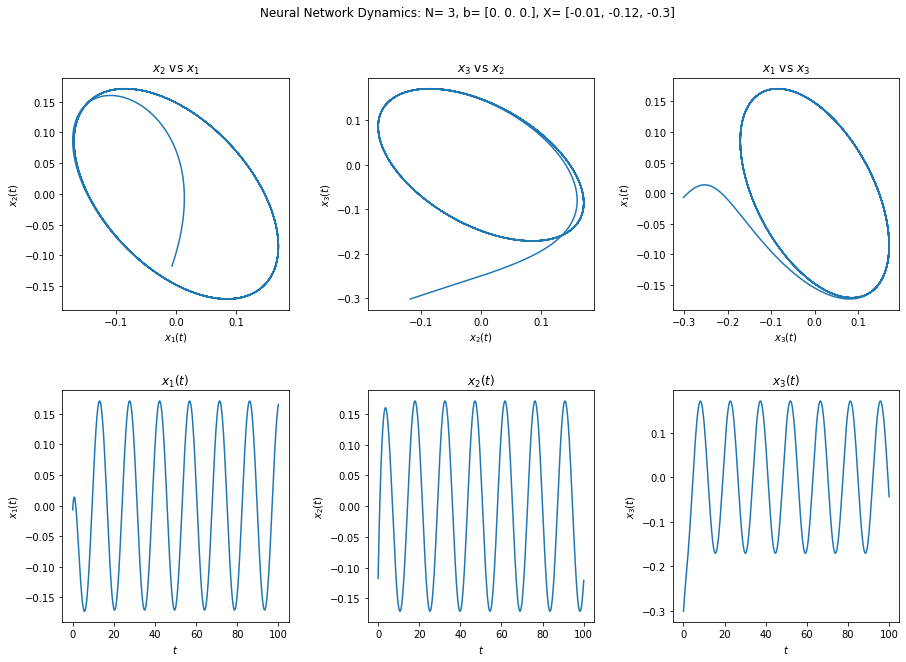

In [6]:
fig,axs = plt.subplots(2,3,figsize=(15,10))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.35)

# Calculate Trajectory
#X = [-0.65, 0.20, 0.34]  # Conditions for nicely shaped oscillations
X = generate_initial_cond(N)
trajectory0 = spi.odeint(firing_rates,X,t,args=(W,b,N))
X = [round(x,2) for x in X]  # Format to fit on graph

# Plot neuron vs neuron
axs[0,0].plot(trajectory0[:,0],trajectory0[:,1])
axs[0,0].set_xlabel("$x_1(t)$")
axs[0,0].set_ylabel("$x_2(t)$")
axs[0,0].set_title("$x_2$ vs $x_1$")

axs[0,1].plot(trajectory0[:,1],trajectory0[:,2])
axs[0,1].set_xlabel("$x_2(t)$")
axs[0,1].set_ylabel("$x_3(t)$")
axs[0,1].set_title("$x_3$ vs $x_2$")

axs[0,2].plot(trajectory0[:,2],trajectory0[:,0])
axs[0,2].set_xlabel("$x_3(t)$")
axs[0,2].set_ylabel("$x_1(t)$")
axs[0,2].set_title("$x_1$ vs $x_3$")

# Plot steady state vs t
axs[1,0].plot(t,trajectory0[:,0])
axs[1,0].set_xlabel("$t$")
axs[1,0].set_ylabel("$x_1(t)$")
axs[1,0].set_title("$x_1(t)$")

axs[1,1].plot(t,trajectory0[:,1])
axs[1,1].set_xlabel("$t$")
axs[1,1].set_ylabel("$x_2(t)$")
axs[1,1].set_title("$x_2(t)$")

axs[1,2].plot(t,trajectory0[:,2])
axs[1,2].set_xlabel("$t$")
axs[1,2].set_ylabel("$x_3(t)$")
axs[1,2].set_title("$x_3(t)$")

plt.suptitle(f"Neural Network Dynamics: N= {N}, b= {b}, X= {X}")
plt.show();

As expected with oscillating trajectories, when one neuron's firing rate decreases, another increases which results in circular shapes in the first 3 graphs. Each neuron's firing rate oscillates over time. The next example demonstrates that no two neurons fire at the exact same time. The neuron firing rates are shifted equally from each other.   

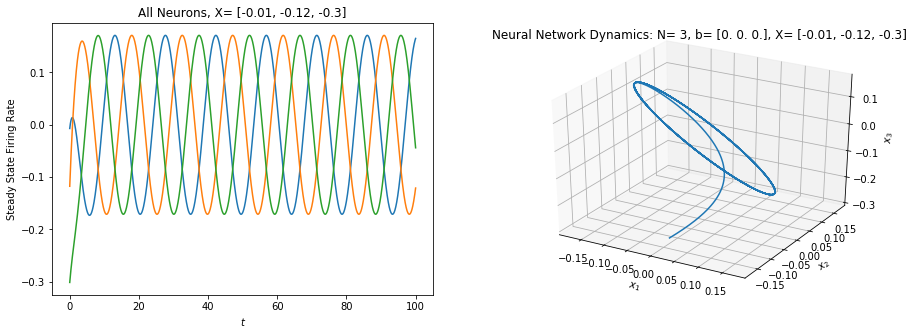

In [7]:
fig = plt.figure(figsize=(15,5))

# Plot t vs trajectory0
ax = fig.add_subplot(1, 2, 1)
ax.plot(t,trajectory0[:,0],label="$x_1$")
ax.plot(t,trajectory0[:,1],label="$x_2$")
ax.plot(t,trajectory0[:,2],label="$x_3$")

# Labels
ax.set_xlabel("$t$")
ax.set_ylabel("Steady State Firing Rate")
ax.set_title(f"All Neurons, X= {X}");

# 3D Plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(trajectory0[:,0],trajectory0[:,1],trajectory0[:,2])

# Labels
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.set_title(f"Neural Network Dynamics: N= {N}, b= {b}, X= {X}")

plt.show();

To understand the behavior of the system further, let's investigate the stability of the eigenvalues. $W$ is imported into a sympy matrix for easy calculation.

**Eigenvalue structures**

- Real, distinct: $
\begin{cases} \lambda_1,\lambda_2>0 \implies \text{Unstable node}\\ \lambda_1,\lambda_2<0 \implies \text{Stable node}\\ \text{one positive, one negative} \implies \text{Saddle point}\end{cases}$
<br><br>
- Real, repeated: $
\begin{cases} \text{two LI eigenvectors} \implies \text{Singular node (could be stable or not)}\\ \text{one LI eigenvector} \implies \text{Degenerate node (could be stable or not)} \end{cases}$
<br><br>
- Real, one zero eigenvalue: $\begin{cases} \text{marginally stable} \end{cases}$
<br><br>
- Complex: $
\begin{cases} Re(\lambda)<0 \implies  \text{Stable focus (i.e. a sprial going toward the center node)} \\ Re(\lambda)>0 \implies  \text{Unstable focus (i.e. a sprial going away the center node)} \\ Re(\lambda)=0  \implies \text{Center node in which the trajectories are circles/ellipses} \end{cases}$

In [8]:
# Format Eigenvalues
_W = sp.Matrix(W)
eigs = list(_W.eigenvals().keys())
eigs = [complex(eig.evalf()) for eig in eigs]
for i,eig in enumerate(eigs):
    eigs[i] = complex(round(eig.real,2),round(eig.imag,2))

W,
eigs

(array([[-1, -2,  0],
        [ 0, -1, -2],
        [-2,  0, -1]]),)

[(-3+0j), -1.73j, 1.73j]

Since there are negative and completely imaginary eigenvalues, the system will continue to oscillate (approximately) at the same bounds for all time. In the next example, the system is simulated with 2 neurons.

In [37]:
# neurons
N = 2

# weight matrix
W = -np.array([
    [1,2,0],
    [0,1,2],
    [2,0,1]
])

# bias
b = np.zeros(N)

# time
t = np.linspace(0., 100, 6000)

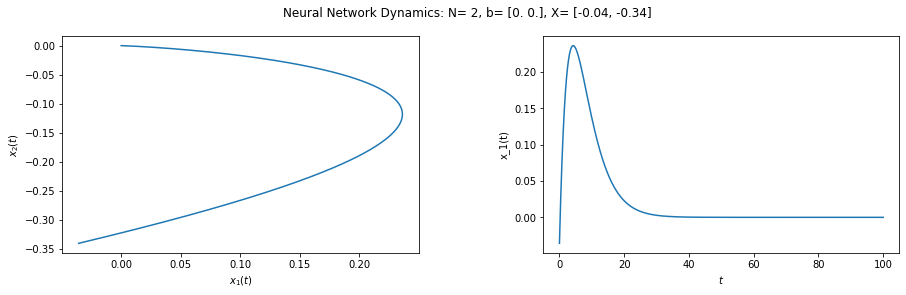

In [39]:
fig,axs = plt.subplots(1,2,figsize=(15,4))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.35)

X = generate_initial_cond(N)
trajectory1 = spi.odeint(firing_rates,X,t,args=(W,b,N))

X = [round(x,2) for x in X]  # Format to fit on graph
axs[0].plot(trajectory1[:,0],trajectory1[:,1])
axs[0].set_xlabel("$x_1(t)$")
axs[0].set_ylabel("$x_2(t)$")

axs[1].plot(t,trajectory1[:,0])
axs[1].set_xlabel("$t$")
axs[1].set_ylabel("x_1(t)")

plt.suptitle(f"Neural Network Dynamics: N= {N}, b= {b}, X= {X}")
plt.show();

Examining the steady states shows there are no oscillations with two neurons. 

<hr>

*b)* Define $W$ and $b$ so that the resulting network is bistable. That is, when one neuron is on in steady state, another is off, and *vice versa*. Simulate the system with different initial conditions. Draw a graph representation of your network.

Following the same pattern of the ring oscillator, variables $j,k,l$ are introduced to the matrix to create a bistable network. The goal is to tune $W$ in order to get the desired behavior. The eigenvalues of the new matrix are plotted to find all possible values. 

The tuning matrix is defined as followed:

$$-\begin{bmatrix}
    1+j & 2+k & l \\
    l & 1+j & 2+k \\
    2+k & l & 1+j \\
\end{bmatrix}$$    

The eigenvalues of the tuning matrix are:

$$\begin{eqnarray}
    \lambda_1 = -j-k-l-3 \\
    \lambda_1 = -j-k-l-3 \\
    \lambda_1 = -j-k-l-3 
\end{eqnarray}$$ 

In [11]:
# Define A
j,k,l = sp.symbols('j,k,l')
W = -np.array([
    [1+j,2+k,0+l],
    [0+l,1+j,2+k],
    [2+k,0+l,1+j]
])

# Find Eigenvalues
_W = sp.Matrix(W)
eigs = list(_W.eigenvals().keys())
eigs

⎡                     k   √3⋅ⅈ⋅k   l   √3⋅ⅈ⋅l              k   √3⋅ⅈ⋅k   l   √3
⎢-j - k - l - 3, -j + ─ - ────── + ─ + ────── - √3⋅ⅈ, -j + ─ + ────── + ─ - ──
⎣                     2     2      2     2                 2     2      2     

⋅ⅈ⋅l       ⎤
──── + √3⋅ⅈ⎥
2          ⎦

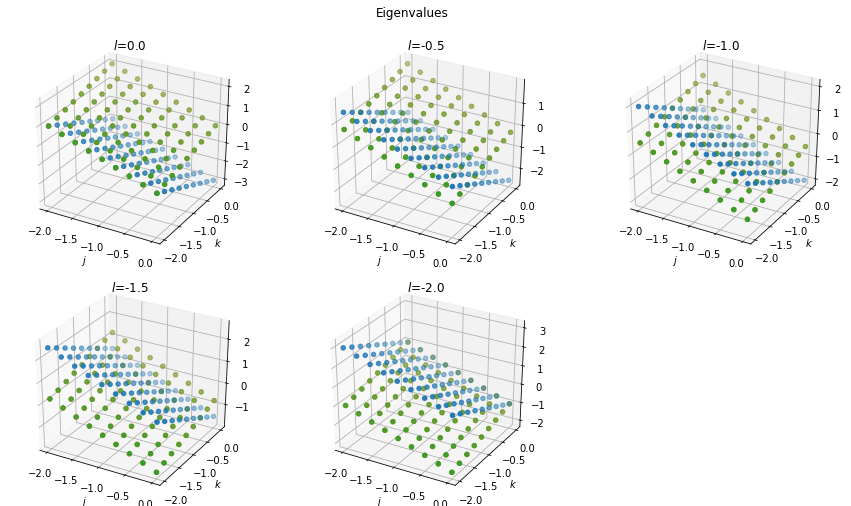

In [12]:
eig0 = lambdify([j,k,l], eigs[0])
eig1 = lambdify([j,k,l], eigs[1])
eig2 = lambdify([j,k,l], eigs[2])

J,K = np.meshgrid(np.linspace(-2, 0, 9),np.linspace(-2, 0, 9))
fig = plt.figure(figsize=(15,8))
plt.subplots_adjust(top=0.925)
plt.subplots_adjust(hspace=0.1)
fig.suptitle(f'Eigenvalues')

for i,L in enumerate(np.linspace(0,-2,5)):
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    ax.scatter(J,K,np.real(eig0(J,K,L)))
    ax.scatter(J,K,np.real(eig1(J,K,L)))
    ax.scatter(J,K,np.real(eig2(J,K,L)))
    ax.set_title(f'$l$={L}')
    ax.set_xlabel("$j$")
    ax.set_ylabel("$k$")

plt.show();

In my investigation, the tuning matrix can have a variety of solutions that result in stable systems. It is necessary for all the eigenvalues to have some real negative value so that the neurons don't oscillate continuously or without bound. A new $W$ matrix is generated by constraining $j,k,l$ to be from $[-2,0]$ and result in stable eigenvalues. In the provided example, there is a 3 by 3 chart such that the bias is varied on the y-axis and the initial condition is varied on the x-axis. 

In [127]:
def generate_stable_weights(N,Jconstraint=None,Kconstraint=None,Lconstraint=None):
    '''
    The current bias can 
    induce spontaneous firing if it is positive 
    or suppress firing if it is negative.
    '''
    W = None
    j,k,l = sp.symbols('j,k,l')
    def W_var():
        return -sp.Matrix([
                    [1+j,2+k,0+l],
                    [0+l,1+j,2+k],
                    [2+k,0+l,1+j]
                ])
    J=random.uniform(-2,0) if Jconstraint == None else float(Jconstraint)
    K=random.uniform(-2,0) if Kconstraint == None else float(Kconstraint)
    L=random.uniform(-2,0) if Lconstraint == None else float(Lconstraint)
    i = 0
    while(1):
        W = W_var().subs({j:J,k:K,l:L})
        eigs = None
        eigs = list(W.eigenvals().keys())
        eigs = np.array([complex(eig.evalf()) for eig in eigs])
        eigs_real = eigs.real
        eigs_stable = eigs_real[eigs_real<=0]
        if eigs_stable.size==N:
            break
        if i>=1000:
            raise Exception(f'No eigenvalues for values j = {J}, k = {K}, l = {L}')
        J=random.uniform(-2,0) if Jconstraint == None else float(Jconstraint)
        K=random.uniform(-2,0) if Kconstraint == None else float(Kconstraint)
        L=random.uniform(-2,0) if Lconstraint == None else float(Lconstraint)
        i+=1
    nfunc = lambdify((),W)
    return nfunc()

In [128]:
def plot_bistable_network(W,B):
    '''
    W is the weight matrix
    B is the list of bias 
    '''
    
    # Format Eigenvalues
    _W = sp.Matrix(W)
    eigs = list(_W.eigenvals().keys())
    eigs = [complex(eig.evalf()) for eig in eigs]
    for i,eig in enumerate(eigs):
        eigs[i] = complex(round(eig.real,2),round(eig.imag,2))

    # Stable Plot
    fig = plt.figure(figsize=(15,12))
    plt.subplots_adjust(hspace=0.35)
    plt.subplots_adjust(wspace=0.35)
    plt.suptitle(f"Neural Network Dynamics: N= {N}, Eigs= {eigs}")

    # time
    t = np.linspace(0., 200, 10000)

    # Initial Conditions
    X = [[1,0,0],[0,1,0],[0,0,1]]

    for i in range(len(X)):
        b = [round(b,2) for b in B[i]]

        # Calculate Trajectory0
        trajectory0 = spi.odeint(firing_rates,X[0],t,args=(W,B[i],N))
        x = [round(x,2) for x in X[0]]

        # Plot Trajectory0
        ax = fig.add_subplot(3, 3, 1+3*i)
        ax.plot(t,np.real(trajectory0[:,0]),label="$x_1$")
        ax.plot(t,np.real(trajectory0[:,1]),label="$x_2$")
        ax.plot(t,np.real(trajectory0[:,2]),label="$x_3$")
        ax.set_xlabel("$t$")
        ax.set_ylabel("Steady State Firing Rate")
        ax.set_title(f"b= {b}, X= {x}")

        # Calculate Trajectory1
        trajectory1 = spi.odeint(firing_rates,X[1],t,args=(W,B[i],N))
        x = [round(x,2) for x in X[1]]

        # Plot Trajectory1
        ax = fig.add_subplot(3, 3, 2+3*i)
        ax.plot(t,np.real(trajectory1[:,0]),label="$x_1$")
        ax.plot(t,np.real(trajectory1[:,1]),label="$x_2$")
        ax.plot(t,np.real(trajectory1[:,2]),label="$x_3$")
        ax.set_xlabel("$t$")
        ax.set_ylabel("Steady State Firing Rate")
        ax.set_title(f"b= {b}, X= {x}")

        # Calculate Trajectory2
        trajectory2 = spi.odeint(firing_rates,X[2],t,args=(W,B[i],N))
        x = [round(x,2) for x in X[2]]

        # Plot Trajectory2
        ax = fig.add_subplot(3, 3, 3+3*i)
        ax.plot(t,np.real(trajectory2[:,0]),label="$x_1$")
        ax.plot(t,np.real(trajectory2[:,1]),label="$x_2$")
        ax.plot(t,np.real(trajectory2[:,2]),label="$x_3$")
        ax.set_xlabel("$t$")
        ax.set_ylabel("Steady State Firing Rate")
        ax.set_title(f"b= {b}, X= {x}")

    plt.legend()
    plt.show();

Through experimentation, I found that setting $l=-2$ creates a bistable system such that one neuron is on and the other neurons are off.  The steady state value for the "on" neuron is aprroximately 3 and the "off" neurons have values of 0. It is important to note, the bias completely determines which neurons are in the "on" state.  In the example, I change the bias to excite each neuron individually. The initial condition has no effect on the steady state value of the system. The resulting weight matrix is 

$$-\begin{bmatrix}
    1+j & 2+k & l \\
    l & 1+j & 2+k \\
    2+k & l & 1+j \\
\end{bmatrix}$$   

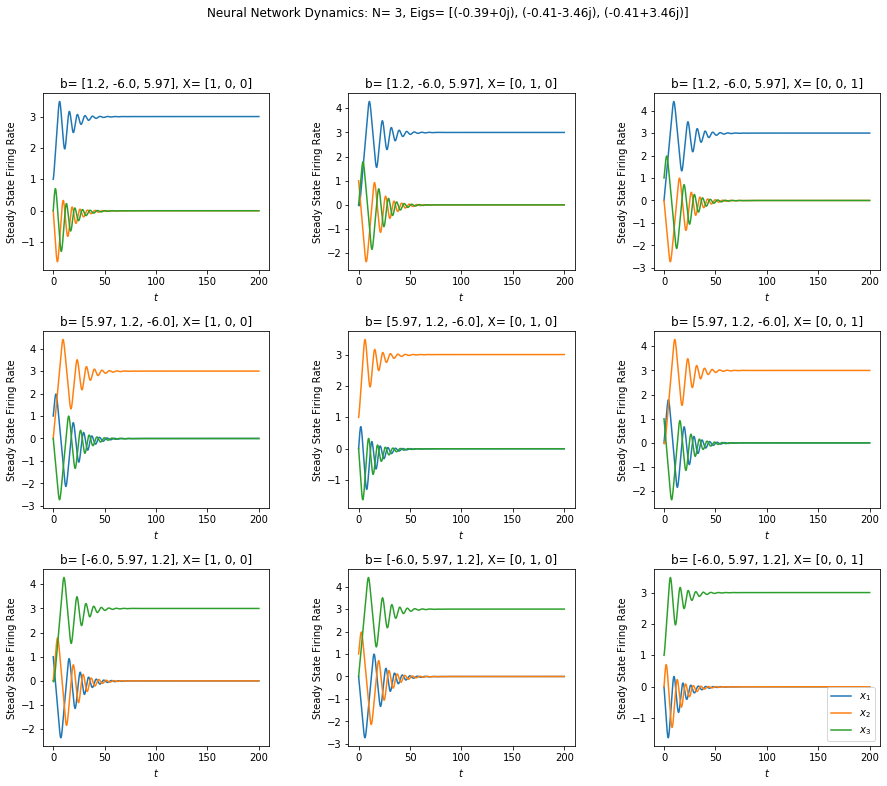

In [148]:
N = 3
W = generate_stable_weights(N,-.6,-.01,-2)
B = [-3*W[:,0],-3*W[:,1],-3*W[:,2]]
plot_bistable_network(W,B)

In [149]:
W
eigs

array([[-0.4 , -1.99,  2.  ],
       [ 2.  , -0.4 , -1.99],
       [-1.99,  2.  , -0.4 ]])

[(-0.91+0j), (-1.01-3.4j), (-1.01+3.4j)]

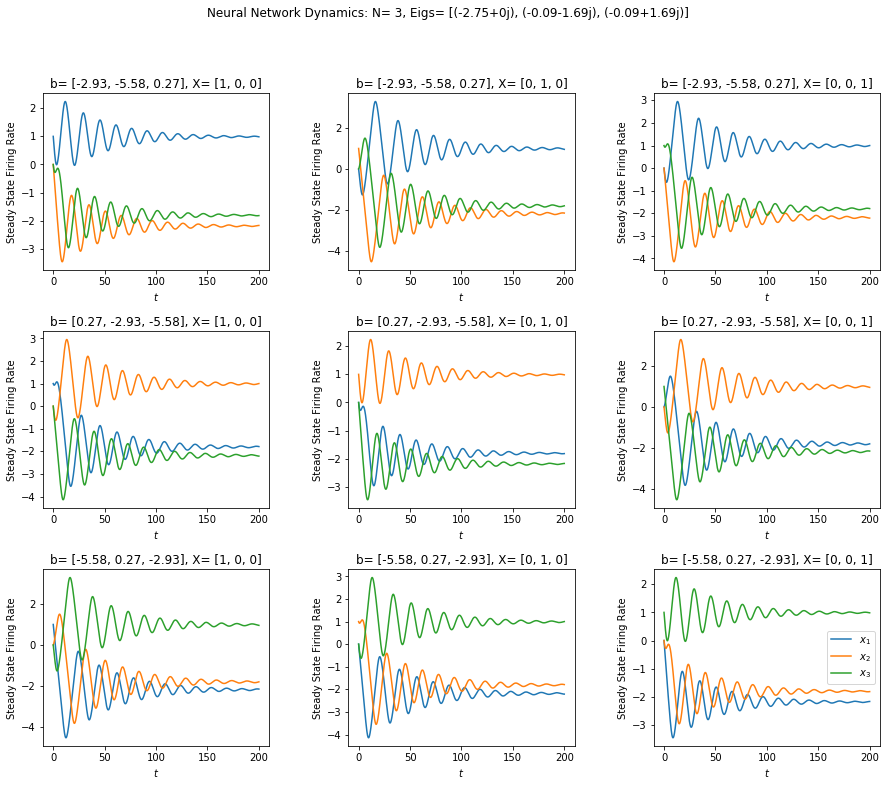

In [126]:
N = 3
W = generate_stable_weights(N,random.uniform(-.1,0),random.uniform(-.25,0),random.uniform(-.25,0))
B = [3*W[0,:],3*W[1,:],3*W[2,:]]
plot_bistable_network(W,B)

In [147]:
W
eigs

array([[-0.4 , -1.99,  2.  ],
       [ 2.  , -0.4 , -1.99],
       [-1.99,  2.  , -0.4 ]])

[(-0.91+0j), (-1.01-3.4j), (-1.01+3.4j)]

For fun, I have plotted the 3D phase portrait of the bistable weight matrix.

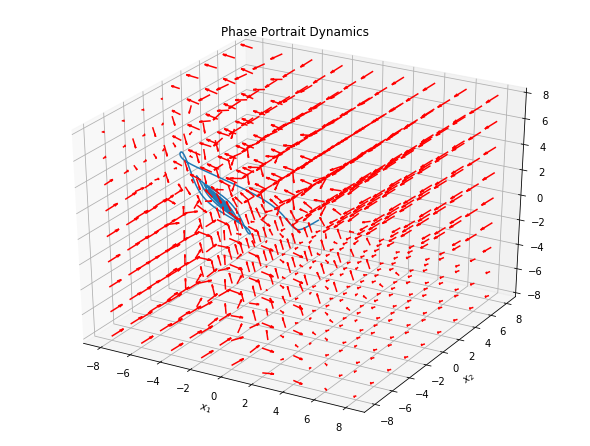

In [17]:
# Meshgrid
r1,r2,r3 = np.meshgrid(np.linspace(-8, 8, 9),np.linspace(-8, 8, 9),np.linspace(-8, 8, 9))
u,v,w = np.zeros(r1.shape),np.zeros(r2.shape),np.zeros(r3.shape)

# Firing Rates
for i in range(len(r1)):
    for j in range(len(r1)):
        for k in range(len(r1)):
            rdot = firing_rates([r1[i,j,k],r2[i,j,k],r3[i,j,k]],0,W,b,N)
            u[i,j,k] = rdot[0]
            v[i,j,k] = rdot[1]
            w[i,j,k] = rdot[2]

x = X[0]
trajectory0 = spi.odeint(firing_rates,x,t,args=(W,b,N))

# Phase Portrait
fig, ax = plt.subplots(figsize=(8,6))
ax = Axes3D(fig)

# Plot
ax.plot(trajectory0[:,0],trajectory0[:,1],trajectory0[:,2])
ax.quiver(r1,r2,r3,u,v,w,color='r')

# Labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Phase Portrait Dynamics')
  
plt.show();

<hr>

*c)* Build a network that contains two subnetworks that oscillate, that are connected in such a way that if one subnetwork oscillates, it prevents the other from oscillating, and *vice versa*. Simulate the system with different initial conditions to show the desired behavior. Draw a graph representation of your network.

In [18]:
def network_dynamics(n, Q, p0):
    '''
    Assumes n is the numer of steps
            Q is the update matrix
            p0 is the starting distribution.
    Returns a matrix of trajectories.
    '''
    # Define trajectory
    trajectory = [p0]
    
    # Probability vector p at every time step
    p = p0
    for _ in range(n):
        p = p.dot(Q)
        trajectory.append(p)
    
    # Numpy Matrix
    trajectory = np.matrix(trajectory).T

    return trajectory

In [19]:
def generate_network_weights(subnetworkN=3):
    N = subnetworkN
    p = random.uniform(0,0.01)
    zeros = np.zeros((N,N))
    #sub0 = generate_stable_weights(N)
    #sub1 = generate_stable_weights(N)
    sub0 = sub1 = -np.array([
    [1,2,0],
    [0,1,2],
    [2,0,1]
    ])
    network = np.append(
        np.append(sub0,zeros,1),
        np.append(zeros,sub1,1), 0
    )
    network[N-1,N] = -p 
    network[N,N-1] = -p 
    return network

In [20]:
Q0 = -np.array([
        [1,2,0],
        [0,1,2],
        [2,0,1]
    ])
Q1 = generate_network_weights()
b = np.zeros(6)
t = np.linspace(0., 300, 6000)

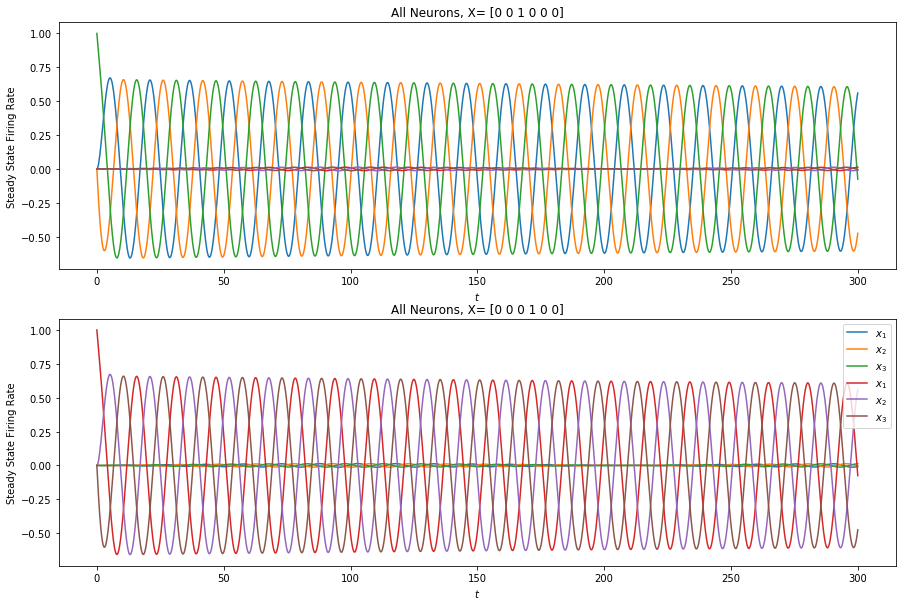

In [21]:
fig = plt.figure(figsize=(15,10))

# Calculate Trajectory with Initial Conditions in Subnetwork 0
X = np.array([0,0,1,0,0,0])
trajectory0 = spi.odeint(firing_rates,X,t,args=(Q1,b,6))

# Plot trajectory0 vs t
ax = fig.add_subplot(2, 1, 1)
ax.plot(t,trajectory0[:,0],label="$x_1$")
ax.plot(t,trajectory0[:,1],label="$x_2$")
ax.plot(t,trajectory0[:,2],label="$x_3$")
ax.plot(t,trajectory0[:,3],label="$x_1$")
ax.plot(t,trajectory0[:,4],label="$x_2$")
ax.plot(t,trajectory0[:,5],label="$x_3$")

# Labels
ax.set_xlabel("$t$")
ax.set_ylabel("Steady State Firing Rate")
ax.set_title(f"All Neurons, X= {X}");

# Calculate Trajectory with Initial Conditions in Subnetwork 1
X = np.array([0,0,0,1,0,0])
trajectory1 = spi.odeint(firing_rates,X,t,args=(Q1,b,6))

# Plot trajectory1 vs t
ax = fig.add_subplot(2, 1, 2)
ax.plot(t,trajectory1[:,0],label="$x_1$")
ax.plot(t,trajectory1[:,1],label="$x_2$")
ax.plot(t,trajectory1[:,2],label="$x_3$")
ax.plot(t,trajectory1[:,3],label="$x_1$")
ax.plot(t,trajectory1[:,4],label="$x_2$")
ax.plot(t,trajectory1[:,5],label="$x_3$")

# Labels
ax.set_xlabel("$t$")
ax.set_ylabel("Steady State Firing Rate")
ax.set_title(f"All Neurons, X= {X}")

plt.legend()
plt.show();

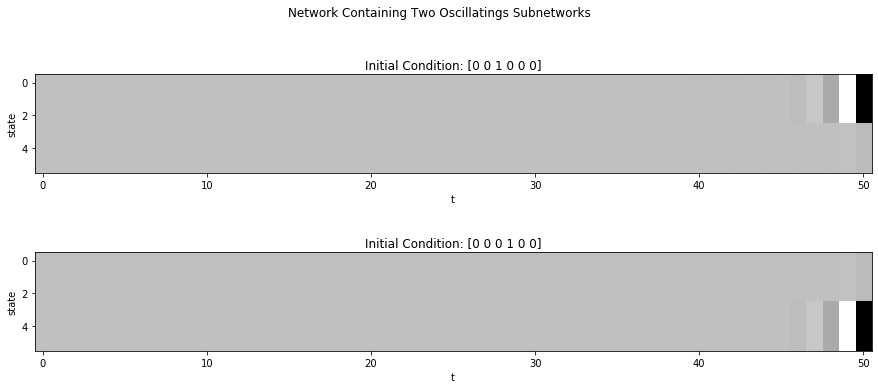

In [22]:
# Trajectory A
p0 = np.array([0,0,1,0,0,0])
trajectoryA = network_dynamics(50,Q1,p0)

# Trajectory B
p1 = np.array([0,0,0,1,0,0])
trajectoryB = network_dynamics(50,Q1,p1)

# Plot
fig,axs = plt.subplots(2,1,figsize=(15,6))
plt.suptitle('Network Containing Two Oscillatings Subnetworks')

axs[0].imshow(trajectoryA,cmap="gray_r")
axs[0].set_xlabel("t")
axs[0].set_ylabel("state")
axs[0].set_title(f'Initial Condition: {p0}')

axs[1].imshow(trajectoryB,cmap="gray_r")
axs[1].set_xlabel("t")
axs[1].set_ylabel("state")
axs[1].set_title(f'Initial Condition: {p1}');

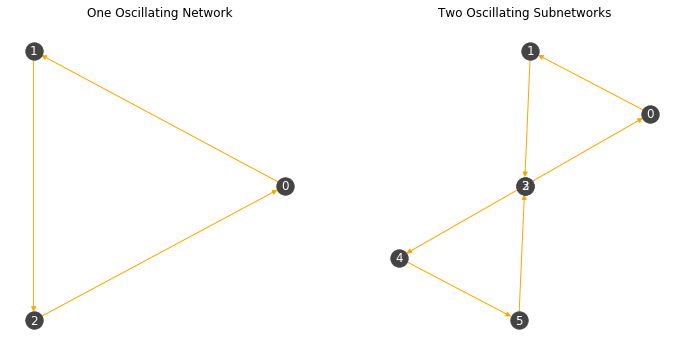

In [23]:
# Network Graphs
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 2, 1)

# Plot One Oscillating Network
G = nx.from_numpy_array(abs(Q0),create_using=nx.DiGraph)
nx.draw(G, 
        pos=nx.kamada_kawai_layout(G), 
        ax=ax,
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        edge_color = "orange",
        width = 1)
ax.set_title(f"One Oscillating Network")

# Plot Two Oscillating Subnetworks
ax = fig.add_subplot(1, 2, 2)
G = nx.from_numpy_array(abs(Q1),create_using=nx.DiGraph)
nx.draw(G, 
        pos=nx.kamada_kawai_layout(G), 
        ax=ax,
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        edge_color = "orange",
        width = 1)
ax.set_title(f"Two Oscillating Subnetworks")

plt.show();

<hr>

*d)* Define $W \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}^n$ with $n = 50$ to be a random neural network. 

Given a number $p \in [0,1]$, define a random matrix $A$ as follows. For each $i,j$, choose $r \in [0,1]$ randomly. Then put

$$
A_{i,j} = \left \{
\begin{array}{ll}
1 & \mathrm{if} & r \leq \frac{p}{2} \\
-1 & \mathrm{if} & \frac{p}{2} < r \leq p \\
0 & \mathrm{otherwise}.
\end{array}
\right .
$$

Then put 

$$
W = A - I
$$

where $I$ is the identity matrix. Through simulations with $n=20$, explain the various behaviors you can get with various values of $p$. 


In [24]:
N = 50
W = []

# Dynamics of Matrix A
def switch (p):
    r = random.uniform(0,1)
    if r<= p/2:
        return 1
    elif p/2<r and r<=p:
        return -1
    else:
        return 0
vectorized_func = np.vectorize(switch)

In [25]:
def plot_random_neural_network(p,N):
    # Initialize
    #b = np.random.uniform(-1,1,size=N)
    b = np.zeros(N)
    I = np.identity(N)
    t = np.linspace(0., 50, 6000)
    X = np.random.uniform(-.1,.1,20) # simulations with n = 20
    
    A = np.zeros((N,N),dtype=float)
    A[:,:] = p
    A = vectorized_func(A)
    W = np.add(A,-I)
    trajectory = spi.odeint(firing_rates,X,t,args=(W,b,20))

    # Figure Size
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1, 1, 1)

    # Plot
    for j in range(20):
        ax.plot(t,trajectory[:,j])

    # Labels
    ax.set_xlabel("$t$")
    ax.set_ylabel("Steady State Firing Rate")
    ax.set_title(f'p = {p}')
    plt.show()
    return W

In [26]:
def graph_from_numpy(W,figsize):
    G = nx.from_numpy_array(W)

    fig,ax = plt.subplots(1,1,figsize=figsize)
    nx.draw(G, 
            #pos=nx.kamada_kawai_layout(G), 
            ax=ax,
            with_labels=True, 
            node_color='#444444',
            font_color="white",
            edge_color = "orange",
            width = 0.5)
    ax.set_title(f"Graph Representation for Random Neural Walk");

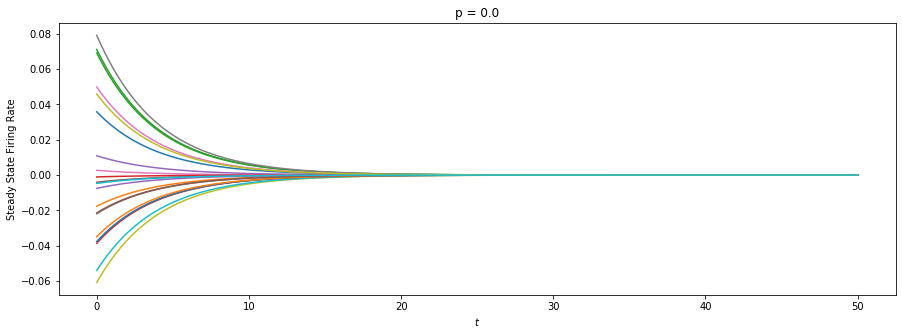

In [27]:
p = 0.0
W.append( plot_random_neural_network(p,N) )

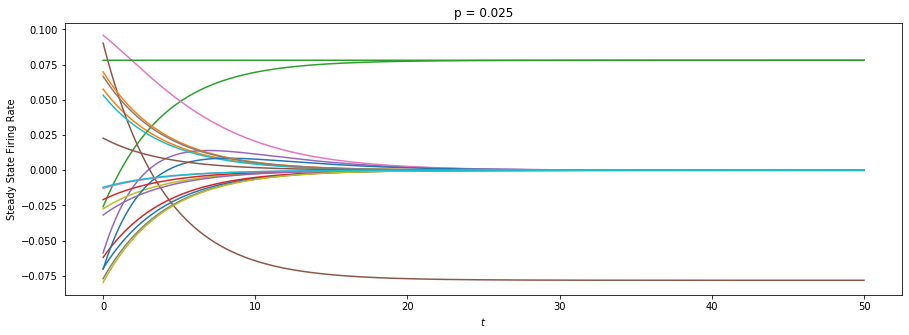

In [28]:
p = 0.025
W.append( plot_random_neural_network(p,N) )

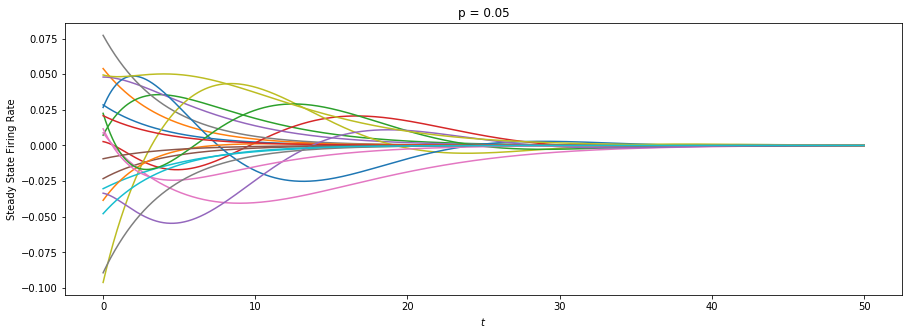

In [29]:
p = 0.05
W.append( plot_random_neural_network(p,N) )

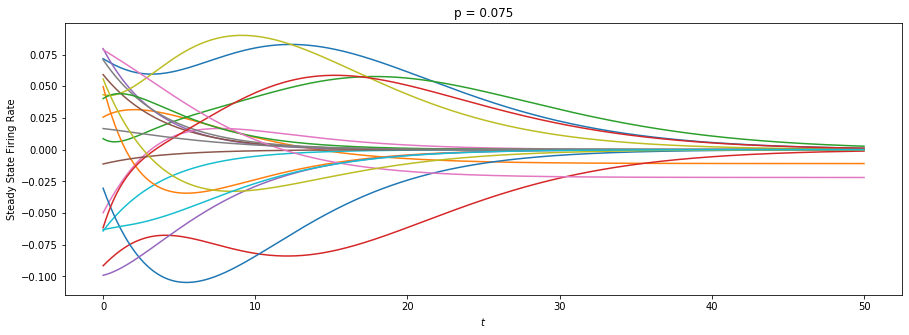

In [30]:
p = 0.075
W.append( plot_random_neural_network(p,N) )

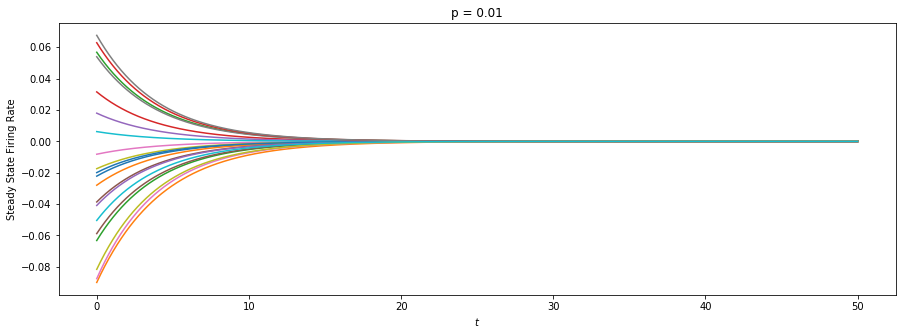

In [31]:
p = 0.01
W.append( plot_random_neural_network(p,N) )

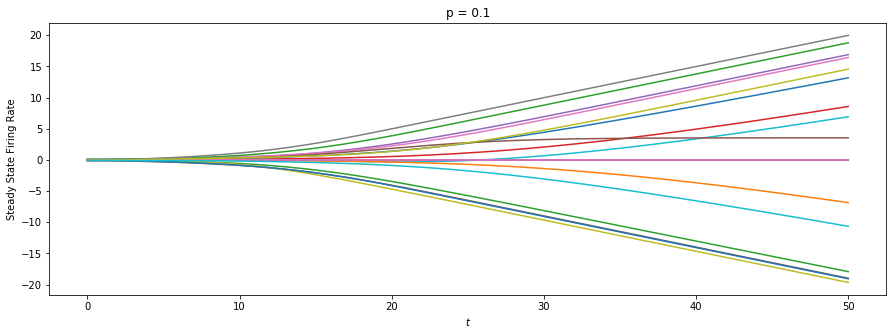

In [32]:
p = 0.1
W.append( plot_random_neural_network(p,N) )

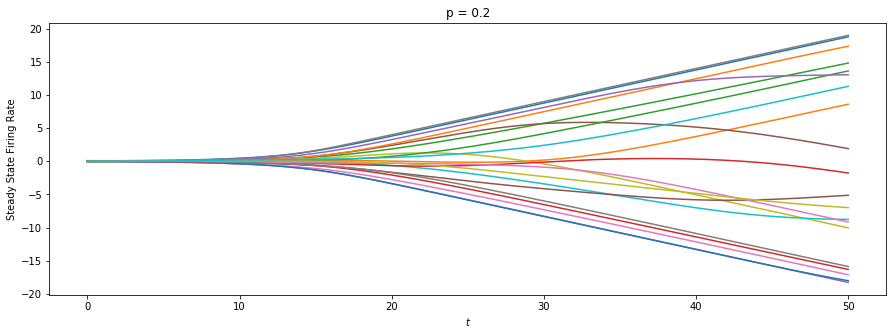

In [33]:
p = 0.2
W.append( plot_random_neural_network(p,N) )

At p=0, the steady states are uniform in the range from -20 to 20. Each neuron increases to it's steady state value and remains there for all future time. Along the main diagonal, W has values of all -1. This means that each neuron is dependent upon its own initial state and bias. The other neurons have no effect on its steady state.

At p=0.5, 

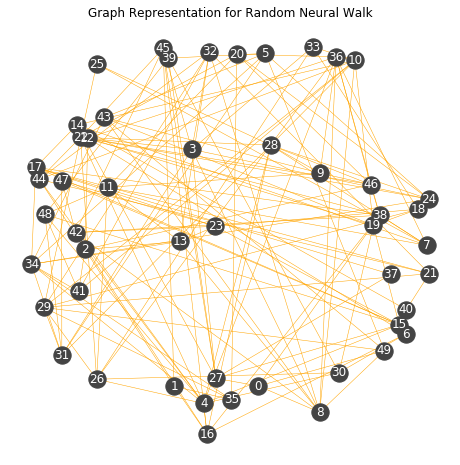

In [34]:
graph_from_numpy(W[3],(8,8))

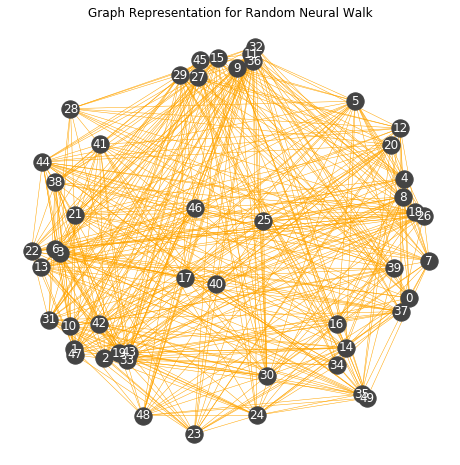

In [35]:
graph_from_numpy(W[-1],(8,8))